In [1]:
!pip install qiskit
import qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.3 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 86.0 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc
import pylatexenc
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=48cf000d13c5434e2cc274b7595b9fb3540e35931c7cd5b609a370bcfcf1862d
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [4]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit_aer import AerSimulator
from IPython.display import display
import pylatexenc
def HSHT_circuit(initial_state='0'):
    qc = QuantumCircuit(1, 1)
    if initial_state == '1':
        qc.x(0)
    qc.h(0)
    qc.s(0)
    qc.h(0)
    qc.t(0)
    qc.measure(0, 0)
    return qc


Circuit for input |0⟩:


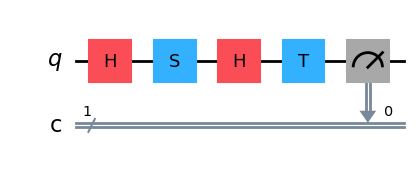

Circuit for input |1⟩:


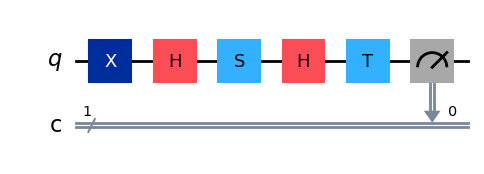

Results for input |0⟩:


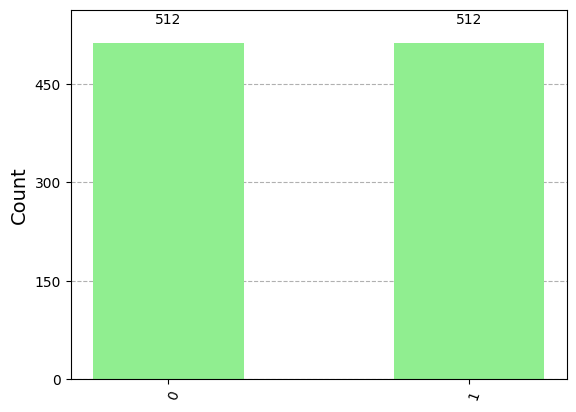

Results for input |1⟩:


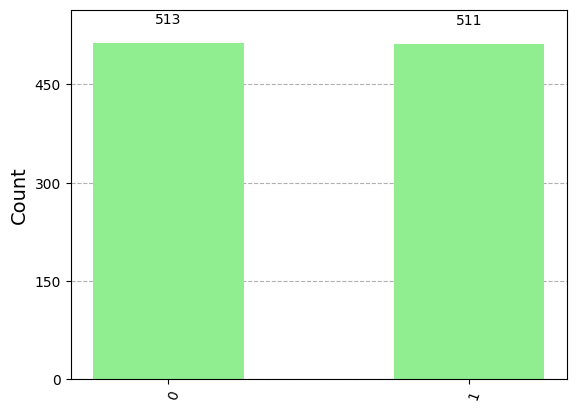

In [5]:
simulator = AerSimulator()
qc0 = HSHT_circuit('0')
qc1 = HSHT_circuit('1')
print("Circuit for input |0⟩:")
display(qc0.draw(output='mpl'))
print("Circuit for input |1⟩:")
display(qc1.draw(output='mpl'))
qc0_transpiled = transpile(qc0, simulator)
qc1_transpiled = transpile(qc1, simulator)
job0 = simulator.run(qc0_transpiled, shots=1024)
result0 = job0.result()
counts0 = result0.get_counts(qc0_transpiled)
job1 = simulator.run(qc1_transpiled, shots=1024)
result1 = job1.result()
counts1 = result1.get_counts(qc1_transpiled)
print("Results for input |0⟩:")
display(plot_histogram(counts0, color='lightgreen'))
print("Results for input |1⟩:")
display(plot_histogram(counts1, color='lightgreen'))

**2. Check the Reversibility of the Operation HSHT and Comment on That**

In [6]:
def HSHT_reversible_circuit(initial_state='0'):
    qc = QuantumCircuit(1, 1)
    if initial_state == '1':
        qc.x(0)
    qc.h(0)
    qc.s(0)
    qc.h(0)
    qc.t(0)
    qc.tdg(0)
    qc.h(0)
    qc.sdg(0)
    qc.h(0)
    qc.measure(0, 0)
    return qc

Reversible Circuit for input |0⟩:


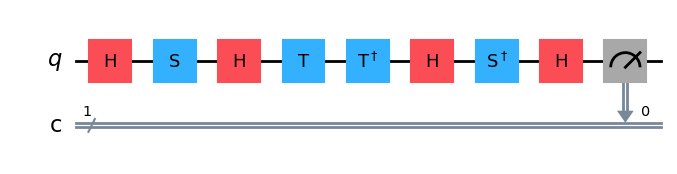

Reversible Circuit for input |1⟩:


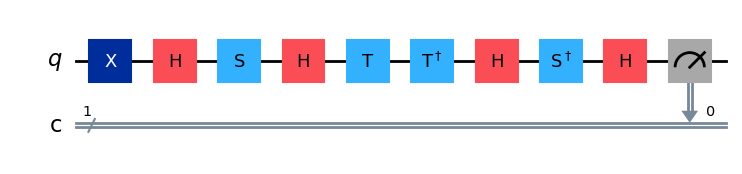

Reversibility check for input |0⟩:


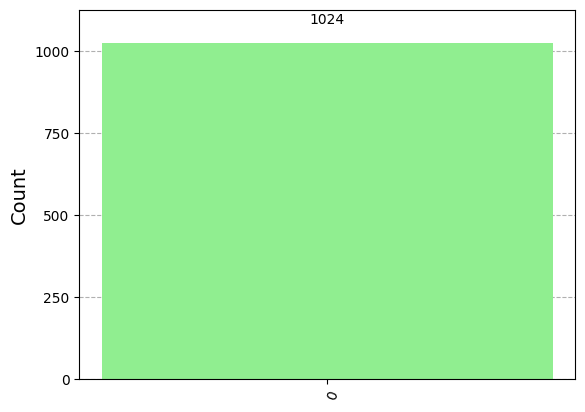

Reversibility check for input |1⟩:


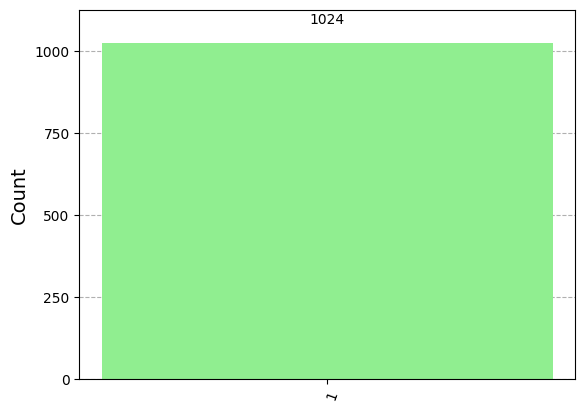

In [7]:
qc0_rev = HSHT_reversible_circuit('0')
qc1_rev = HSHT_reversible_circuit('1')
print("Reversible Circuit for input |0⟩:")
display(qc0_rev.draw(output='mpl'))
print("Reversible Circuit for input |1⟩:")
display(qc1_rev.draw(output='mpl'))
qc0_rev_transpiled = transpile(qc0_rev, simulator)
qc1_rev_transpiled = transpile(qc1_rev, simulator)
job0_rev = simulator.run(qc0_rev_transpiled, shots=1024)
result0_rev = job0_rev.result()
counts0_rev = result0_rev.get_counts(qc0_rev_transpiled)
job1_rev = simulator.run(qc1_rev_transpiled, shots=1024)
result1_rev = job1_rev.result()
counts1_rev = result1_rev.get_counts(qc1_rev_transpiled)
print("Reversibility check for input |0⟩:")
display(plot_histogram(counts0_rev, color='lightgreen'))
print("Reversibility check for input |1⟩:")
display(plot_histogram(counts1_rev, color='lightgreen'))

**3. Design a Quantum Circuit Using H and CNOT Gate and Check the Output for Various Input Combinations**

In [8]:
from qiskit import QuantumRegister, ClassicalRegister

def bell_state_circuit(initial_state='00'):
    X = QuantumRegister(1, "X")
    Y = QuantumRegister(1, "Y")
    A = ClassicalRegister(1, "A")
    B = ClassicalRegister(1, "B")
    qc = QuantumCircuit(Y, X, B, A)
    if initial_state[0] == '1':
        qc.x(Y[0])
    if initial_state[1] == '1':
        qc.x(X[0])
    qc.h(Y[0])
    qc.cx(Y[0], X[0])
    qc.measure(Y[0], B[0])
    qc.measure(X[0], A[0])
    return qc

Circuit for input |00⟩:


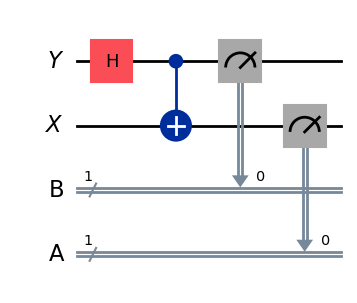

Results for input |00⟩:


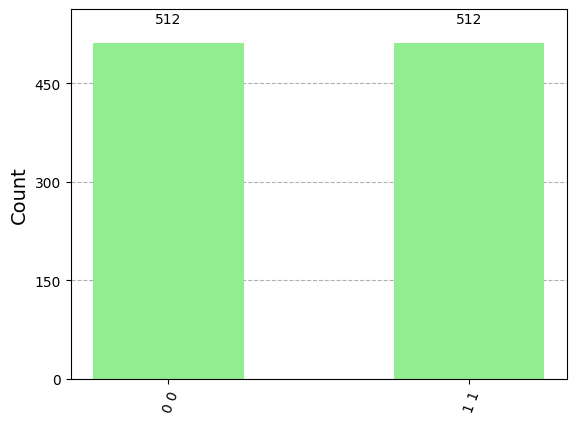

Circuit for input |01⟩:


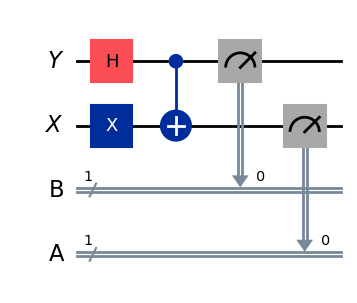

Results for input |01⟩:


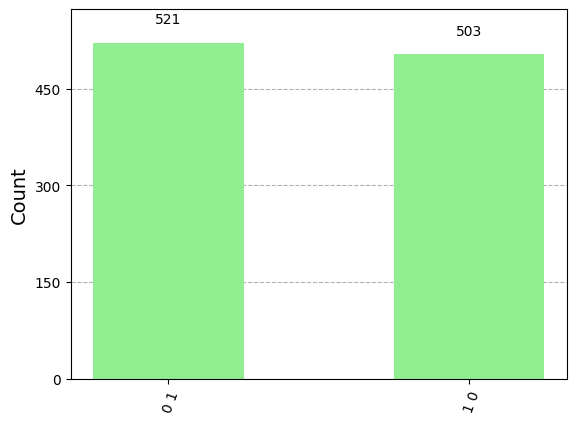

Circuit for input |10⟩:


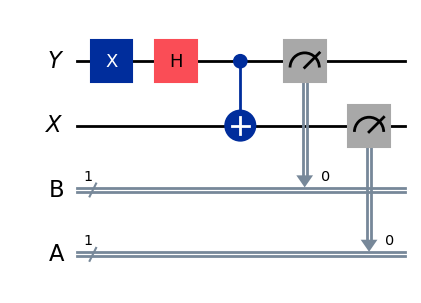

Results for input |10⟩:


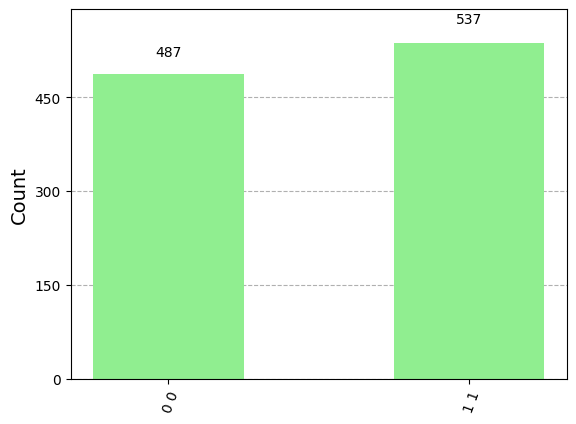

Circuit for input |11⟩:


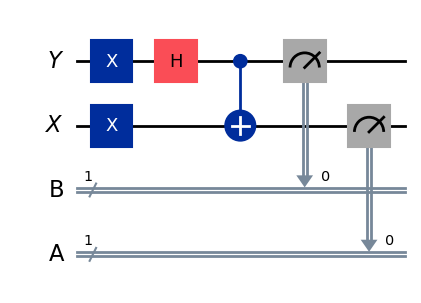

Results for input |11⟩:


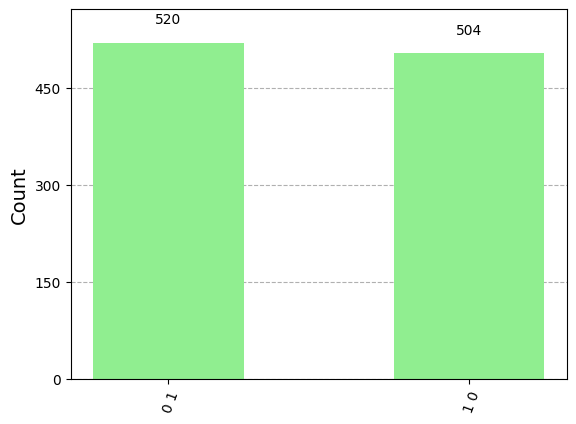

In [9]:
simulator = AerSimulator()
inputs = ['00', '01', '10', '11']
results = {}

for state in inputs:
    qc = bell_state_circuit(state)
    print(f"Circuit for input |{state}⟩:")
    display(qc.draw(output='mpl'))
    qc_transpiled = transpile(qc, simulator)
    job = simulator.run(qc_transpiled, shots=1024)
    result = job.result()
    counts = result.get_counts(qc_transpiled)
    results[state] = counts
    print(f"Results for input |{state}⟩:")
    display(plot_histogram(counts, color='lightgreen'))

**4. Comments on the Output Generated by the Above Circuit and Establish the Relation with Bell States**


Bell States Formation:

The circuit transforms different initial states into specific Bell states.
For example, starting from
, the circuit produces the Bell state.


Measurement Correlations:

The measurement outcomes are correlated due to entanglement.
Observing one qubit gives information about the other.


Relation with Bell States:

The four input combinations does correspond to the four Bell states.




Conclusion:

By updating the code to use transpile and backend.run(), we ensure compatibility with Qiskit 1.0 and later versions. The simulations demonstrate:


HSHT Circuit:

Shows how the HSHT operation transforms input states and is reversible.

H and CNOT Circuit:

Illustrates the creation of entangled Bell states from different initial inputs.
Highlights the importance of entanglement in quantum computing.